# TP 2.2 : Estimation

## 1. Loi de Pareto

On considère dans cette partie une variable aléatoire suivant une loi de Pareto d'indice $\alpha$. C'est-à-dire $X\sim \mathcal{P}(\alpha)$ si 
$$
\mathbb{P}(X>t)=x^{-\alpha},\quad t>1.
$$
On supposera, si besoin, que le parametre $\alpha>2$ pour s'arrurer que l'espérance et la variance de $X$ soit bien définie.


<div class="alert alert-block alert-success">
    En utilisant le fait suivant :
Si $Z$ est une variable aléatoire de fonction de répartition $F$ alors si $U\sim \mathcal{U}([0,1])$, la variable $F^{-1}(U)$ suit la même loi que $Z$.

Construire un vecteur de taille 100 contenant des réalisations d'une variable aléatoire suivant une loi $\mathcal{P}(3)$.
    
</div>

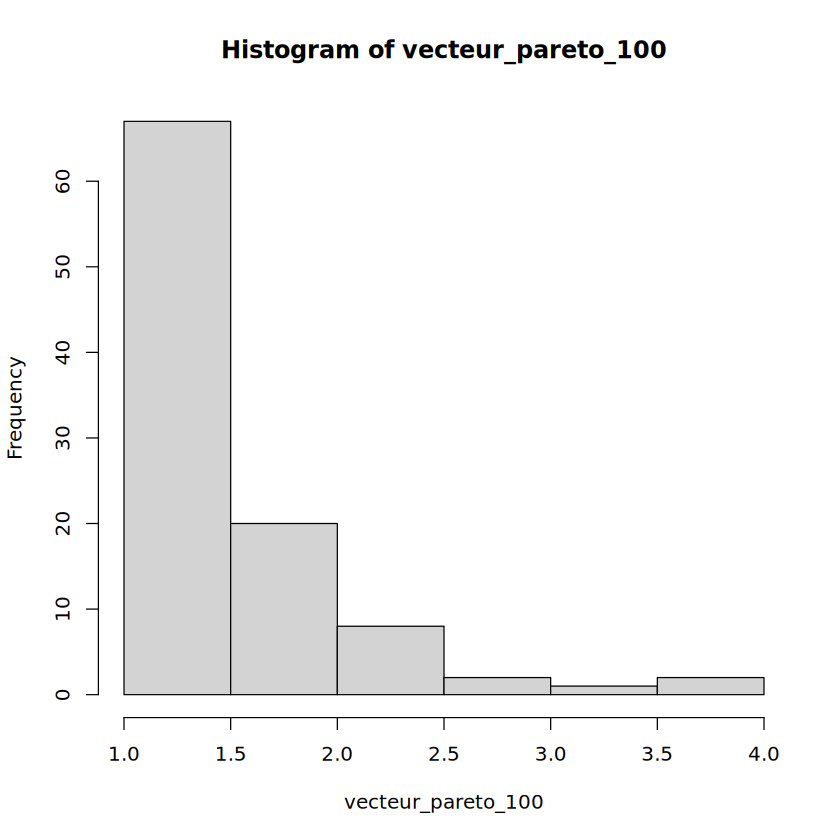

In [8]:
## A FAIRE
par(bg='white')
vecteur_uniform_100 <- runif(100)
vecteur_pareto_100 <- rep(0,100)
for (i in 1:100) {
  vecteur_pareto_100[i] <- (1-vecteur_uniform_100[i])^(-1/3)
}
hist(vecteur_pareto_100)

##  2. Estimation

Dans cette partie on souhaite comparer les estimateurs par la méthodes des moments et du maximum de vraisemblance du parametre $\alpha$.
<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li> Calculer (à la main) l'estimateur par la méthode des moments de $\alpha$.</li>
        <li> Discuter en quelque mots si cet estimateur est fortement consistent ? Asymptotiquement normal ? </li>
        <li> Illustrer numériquement la consistence de l'estimateur des moments. </li>
        <li> Illustrer, en vous inspirant de la première partie du TP 2.1 numériquement, la normalité asymptotique de l'estimateur des moments.</li>
    </ol>
</div>

[1] 3.051534

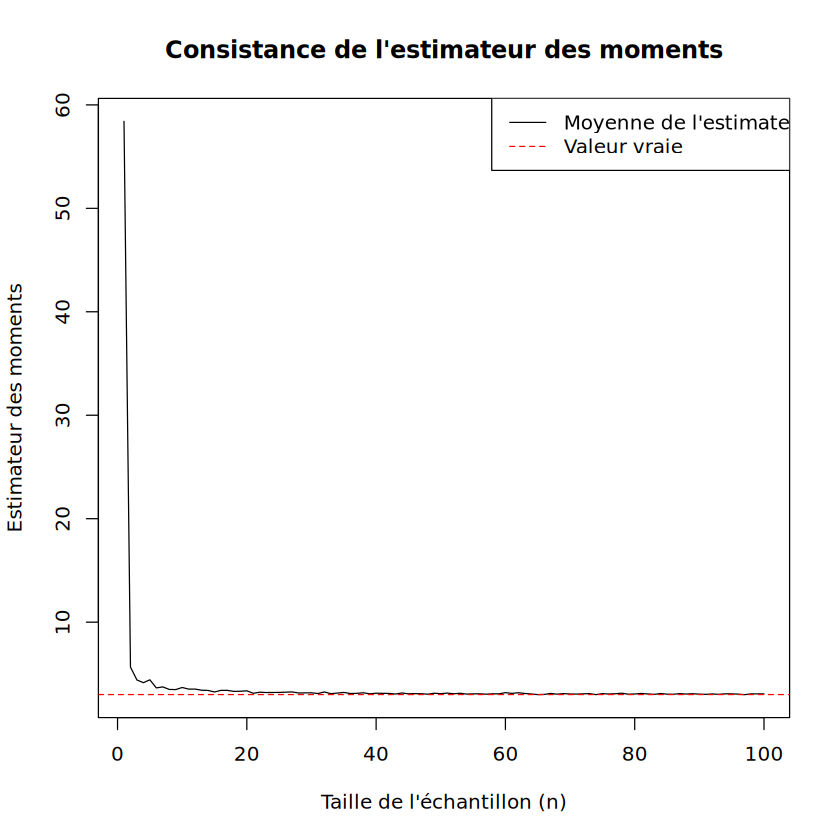

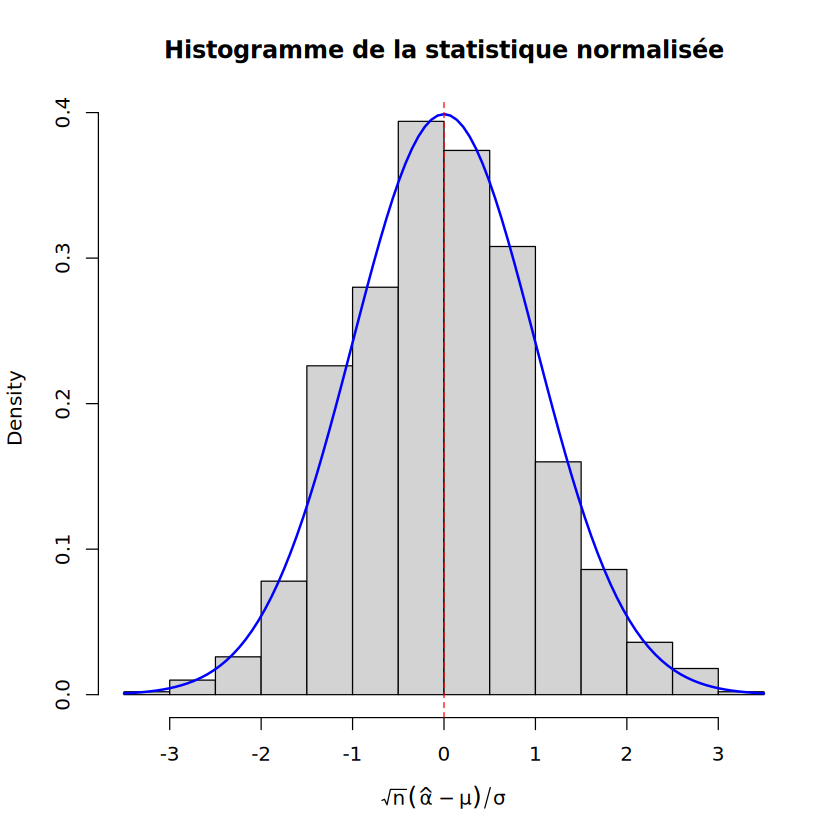

In [45]:
#A FAIRE
par(bg='white')
m<- mean(vecteur_pareto_100)
alpha_moment<- m/(m-1)
alpha_moment
# test de consistance
# ...existing code...
# test de consistance

set.seed(123) # pour la reproductibilité

n_values <- seq(1, 100, by=1)
n_sim <- 100
alpha_true <- 3
alpha_moment_means <- numeric(length(n_values))


for (j in seq_along(n_values)) {
  n <- n_values[j]
  alpha_moments <- numeric(n_sim)
  for (i in 1:n_sim) {
    u <- runif(n)
    x <- (1-u)^(-1/alpha_true)
    m <- mean(x)
    alpha_moments[i] <- m/(m-1)
  }
  alpha_moment_means[j] <- mean(alpha_moments)

}

plot(n_values, alpha_moment_means,type = 'l' ,ylim=range(c(alpha_moment_means, alpha_true)),
     xlab="Taille de l'échantillon (n)", ylab="Estimateur des moments", main="Consistance de l'estimateur des moments")
abline(h=alpha_true, col="red", lty=2)
legend("topright", legend=c("Moyenne de l'estimateur", "Valeur vraie"), col=c("black", "red"), lty=c(1,2))
# ...existing code...
# test de normalité
set.seed(123) # pour la reproductibilité
n <- 100
n_sim <- 1000
alpha_true <- 3
alpha_moments <- numeric(n_sim)
for (i in 1:n_sim) {
  u <- runif(n)
  x <- (1-u)^(-1/alpha_true)
  m <- mean(x)
  alpha_moments[i] <- m/(m-1)
}
# Transformation : sqrt(n) * (estimateur - moyenne) / ecart-type
Z <-  (alpha_moments - mean(alpha_moments)) / sd(alpha_moments)

# Histogram + courbe de densité normale standard
hist(Z, probability=TRUE,
     main="Histogramme de la statistique normalisée",
     xlab=expression(sqrt(n) * (hat(alpha) - mu) / sigma))

curve(dnorm(x, mean=0, sd=1), add=TRUE, col="blue", lwd=2)
abline(v=0, col="red", lty=2)
#hist(alpha_moments, breaks=30, probability=TRUE, main="Histogramme de l'estimateur des moments", xlab="Estimateur des moments")
#curve(dnorm(x, mean=mean(alpha_moments), sd=sd(alpha_moments)), add=TRUE, col="blue", lwd=2)
# test de normalité


<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li> Calculer (à la main) l'estimateur du maximum de vraisemblance de $\alpha$.</li>
        <li> Illustrer numériquement la consistence de l'estimateur des moments. </li>
        <li> Illustrer, en vous inspirant de la première partie du TP 2.1, numériquement la normalité asymptotique de l'estimateur des moments.</li>
    </ol>
</div>

[1] 2.881421

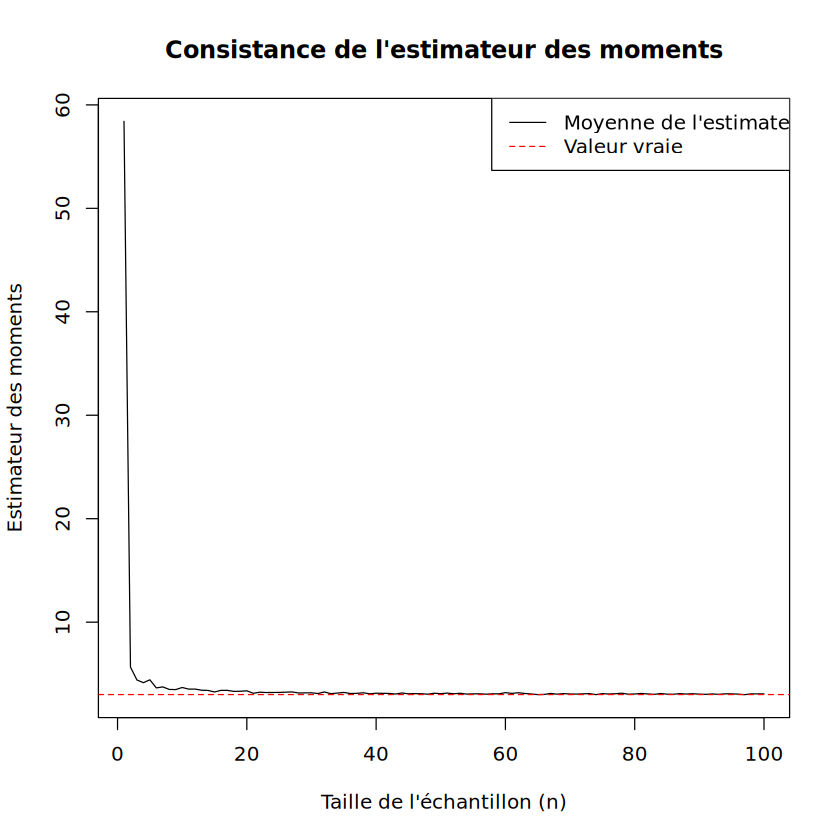

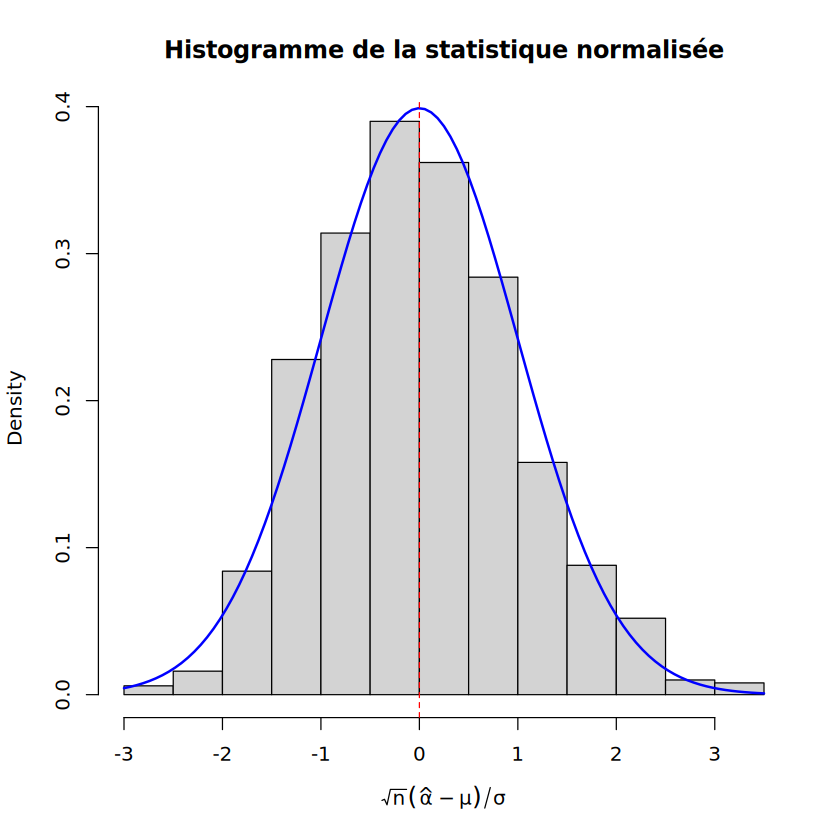

In [52]:
#A FAIRE
par(bg='white')
n=100
alpha_vraisemblance <- n/ (sum(log(vecteur_pareto_100)))
alpha_vraisemblance 
# test de consistance
# ...existing code...
# test de consistance

set.seed(123) # pour la reproductibilité

n_values <- seq(1, 100, by=1)
n_sim <- 100
alpha_true <- 3
alpha_vraisemblance_means <- numeric(length(n_values))


for(j in seq_along(n_values)) {
  n <- n_values[j]
  alpha_vraisemblance <- numeric(n_sim)
  for (i in 1:n_sim) {
    u <- runif(n)
    x <- (1-u)^(-1/alpha_true)

    alpha_moments[i] <- n / (sum(log(x)))
  }
  alpha_vraisemblance_means[j] <- mean(alpha_moments)

}
plot(n_values, alpha_moment_means,type = 'l' ,ylim=range(c(alpha_moment_means, alpha_true)),
     xlab="Taille de l'échantillon (n)", ylab="Estimateur des moments", main="Consistance de l'estimateur des moments")
abline(h=alpha_true, col="red", lty=2)
legend("topright", legend=c("Moyenne de l'estimateur", "Valeur vraie"), col=c("black", "red"), lty=c(1,2))
# ...existing code...
# test de normalité
set.seed(123) # pour la reproductibilité
set.seed(123) # pour la reproductibilité
n <- 100
n_sim <- 1000
alpha_true <- 3
alpha_vraisemblance <- numeric(n_sim)
for (i in 1:n_sim) {
  u <- runif(n)
  x <- (1-u)^(-1/alpha_true)
  m <- mean(x)
  alpha_vraisemblance[i] <- n / (sum(log(x)))
}
# Transformation : sqrt(n) * (estimateur - moyenne) / ecart-type
Z <-  (alpha_vraisemblance - mean(alpha_vraisemblance)) / sd(alpha_vraisemblance)

# Histogram + courbe de densité normale standard
hist(Z, probability=TRUE,
     main="Histogramme de la statistique normalisée",
     xlab=expression(sqrt(n) * (hat(alpha) - mu) / sigma))

curve(dnorm(x, mean=0, sd=1), add=TRUE, col="blue", lwd=2)
abline(v=0, col="red", lty=2)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li> En vous inspirant de la première partie du TP 2.1, calculer la variance de chaqun des deux estimateurs.</li>
        <li> L'un vous semble-t-il plus performent ? Est-ce surprenant ?  </li>
    </ol>
</div>

In [53]:
#A FAIRE
cat("variance de l'estimateur des moments : ", var(alpha_moments), "\n")
cat("variance de l'estimateur du maximum de vraisemblance : ", var(alpha_vraisemblance), "\n")
# test de normalité

variance de l'estimateur des moments :  0.09822009 
variance de l'estimateur du maximum de vraisemblance :  0.08694286 


## 3. Pour aller plus loin : le bootstrap.

Maintenant, contrairement à la première partie du TP 2.1, nous supposerons avoir uniquement un vecteur de 100 réalisation de notre loi de Pareto et qu'il nous est IMPOSSIBLE d'en tirer ou simuler d'avantage.

Pour criconvenir a ce désagrément B. Efron propose en 1979 la méthode suivante :

Soit $X_1,\dots,X_n$ notre échantillon. On va alors tirer dans cet échantillon pour construire un echantillon bootstrap.
Formellement on tirer $u(1),\dots,u(n)$ $n$ variables aléatoires i.i.d uniforme sur {$1,\dots,n$} (donc discrète). Léchantillon bootstrap est alors $X_{u(1)},\dots,X_{u(n)}$.

Attention : ce n'est pas un mélange des $(X_i)$, en effet le même $X_{i_0}$ peut apparaitre plusieur fois dans l'échantillon bootstrap.

Pour $B\in \mathbb{N}$ on peut répéter cette opétation $B$ fois et ainsi obtenir $B$ échantillons noté $X_{1}^b,\dots,X_{n}^b$ pour $b$ allant de $1$ à $B$. Sur chaque échantillon on peut alors construire un estimateur de $\alpha$ et ainsi obtenir $\hat \alpha_n^1,\dot,\hat \alpha_n^B$, $B$ estimateur bootstrap.

Sous certaine condition, en particulier si $\sqrt{n}(\hat \alpha_n-\alpha)\underset{n\rightarrow\infty}{\longrightarrow}\mathcal{N}(0,\sigma^2)$, on a 
$$
\sqrt{B}\left(\frac{1}{B}\sum_{b=1}^B\hat \alpha_n^b-\alpha_n\right)\underset{n\rightarrow\infty}{\longrightarrow}\mathcal{N}(0,\sigma^2).
$$

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li> Mettre en place une procédure bootsrap pour l'estimateur du maximum de vraisemblance. Vous pourrez vous aider de la fonction <code>sample()<code>. </li>
        <li> Vérifier numériquement que la moyenne des estimateur bootstrap vérifie bien la propriété ci dessus. </li>
    </ol>
</div>

Moyenne bootstrap : 2.890669 
Variance bootstrap : 0.06060541 


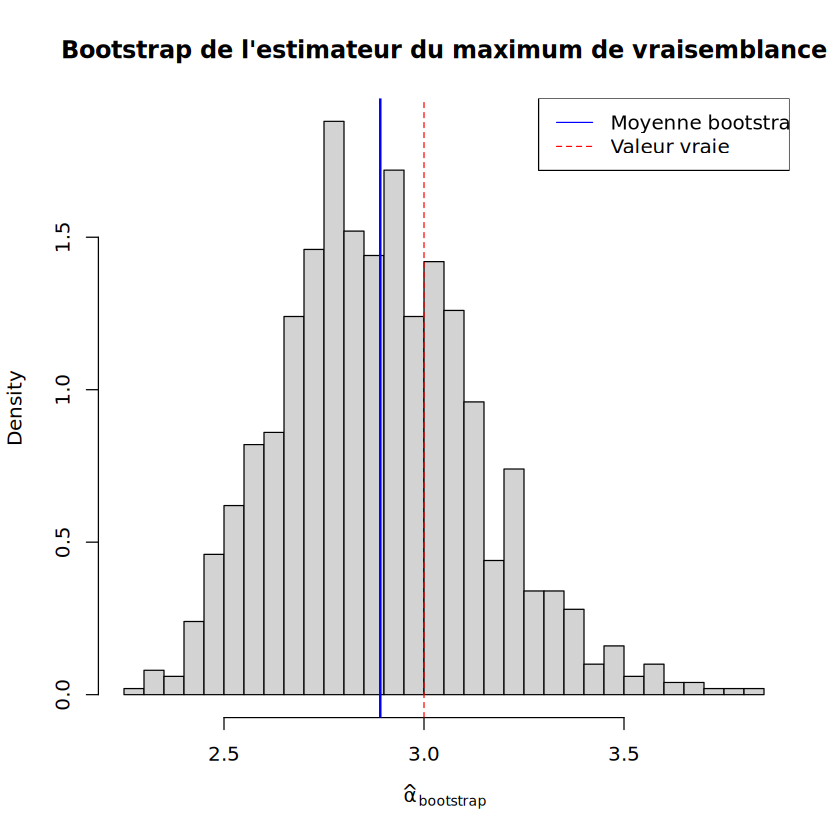

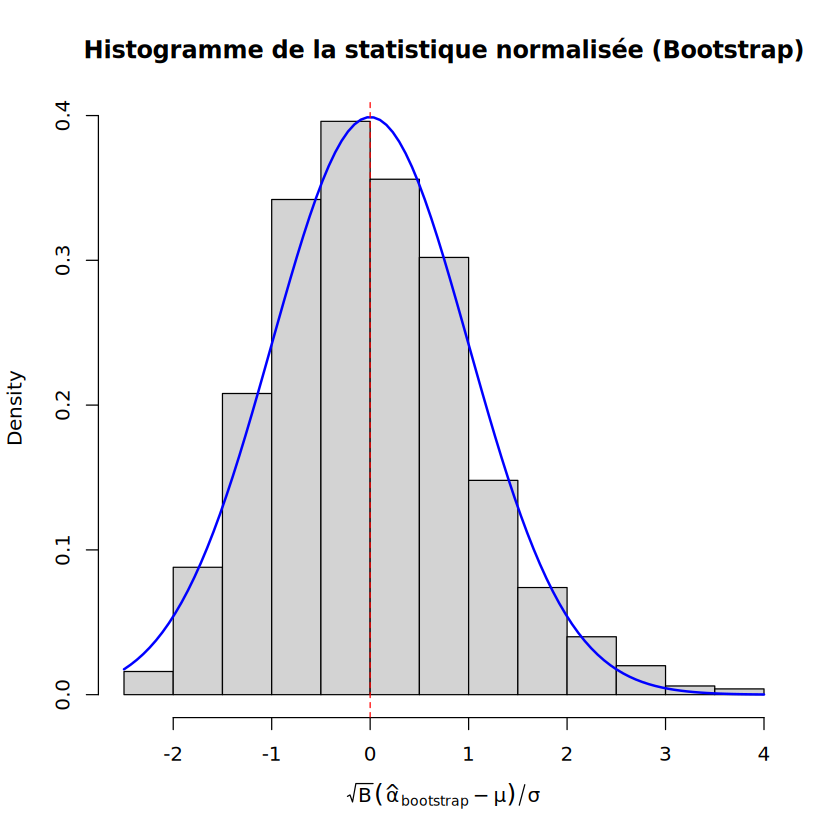

In [56]:
#A FAIRE
# ...existing code...
# Bootstrap pour l'estimateur du maximum de vraisemblance

par(bg='white')
B <- 1000
n <- length(vecteur_pareto_100)
alpha_bootstrap <- numeric(B)

for (b in 1:B) {
  # Tirage bootstrap avec remise
  sample_indices <- sample(1:n, size=n, replace=TRUE)
  x_boot <- vecteur_pareto_100[sample_indices]
  # Estimateur du maximum de vraisemblance sur l'échantillon bootstrap
  alpha_bootstrap[b] <- n / sum(log(x_boot))
}

# Affichage des résultats
hist(alpha_bootstrap, breaks=30, probability=TRUE,
     main="Bootstrap de l'estimateur du maximum de vraisemblance",
     xlab=expression(hat(alpha)[bootstrap]))
abline(v=mean(alpha_bootstrap), col="blue", lwd=2)
abline(v=3, col="red", lty=2)
legend("topright", legend=c("Moyenne bootstrap", "Valeur vraie"), col=c("blue", "red"), lty=c(1,2))

cat("Moyenne bootstrap :", mean(alpha_bootstrap), "\n")
cat("Variance bootstrap :", var(alpha_bootstrap), "\n")
# ...existing code...
Z= (alpha_bootstrap - mean(alpha_bootstrap)) / sd(alpha_bootstrap)
hist(Z, probability=TRUE,
     main="Histogramme de la statistique normalisée (Bootstrap)",
     xlab=expression(sqrt(B) * (hat(alpha)[bootstrap] - mu) / sigma))
curve(dnorm(x, mean=0, sd=1), add=TRUE, col="blue", lwd=2)
abline(v=0, col="red", lty=2)


<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions : Les questions 2 et 3 concernent les tests que nous verrons demain, vous pourrez donc y revenir à ce moment la.
    <ol>
        <li> Se servir de cette méthode pour estimer la variance de l'estimateur du maximum de vraisemblance. </li>
        <li> Comment se servir de cette méthode pour construire un test de niveau $0.95$ testant l'hypothèse $H_0 : \alpha= 3$ contre l'alternative $H_1\neq 3$ </li>
        <li> Vous chercherez à évaluer la puissance de ce test en fonction de $\alpha$. </li>
    </ol>
</div>

In [58]:
#A FAIRE
par(bg='white')
cat("variance de l'estimateur des moments : ", var(alpha_bootstrap), "\n")
ci_perc <- quantile(alpha_bootstrap, c(0.025, 0.975))
rej_ic <- !(ci_perc[1] <= 3 && 3 <= ci_perc[2])
cat("IC percentile 95% :", ci_perc, "\n")
cat("Rejet via IC percentile :", rej_ic, "\n")


variance de l'estimateur des moments :  0.06060541 
IC percentile 95% : 2.469757 3.41584 
Rejet via IC percentile : FALSE 
